# Exercises

#### 1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
# get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
# convert Date column to datetime dtype
df.Date = pd.to_datetime(df.Date)

In [5]:
df = df.set_index('Date').sort_index()

In [6]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [7]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [8]:
def inner_upper_and_lower_fence(df, col, mult):
    q1 = df[col].quantile(.025)
    q3 = df[col].quantile(.075)
    iqr = q3 - q1
    inner_lower_fence = q1 - (mult * iqr)
    inner_upper_fence = q3 + (mult * iqr)
    
    return inner_upper_fence, inner_lower_fence

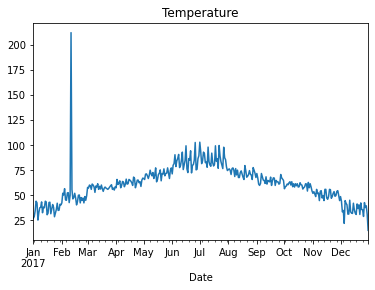

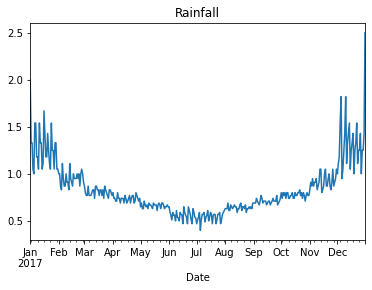

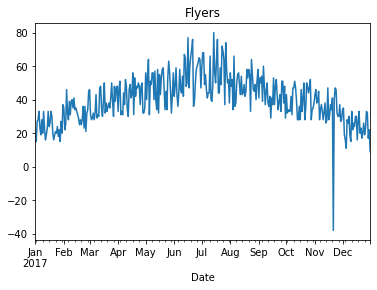

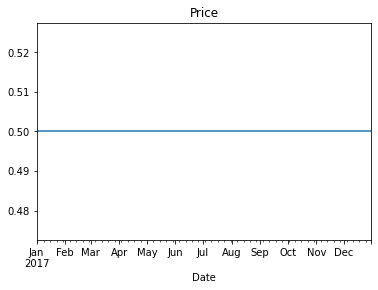

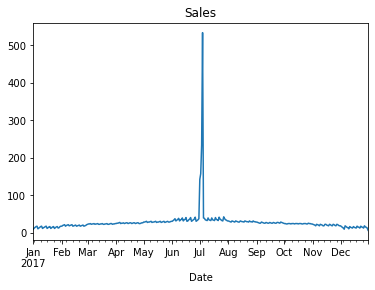

In [9]:
for col in df.drop(columns='Day').columns:
    df[col].plot()
    plt.title(col)
    plt.show()

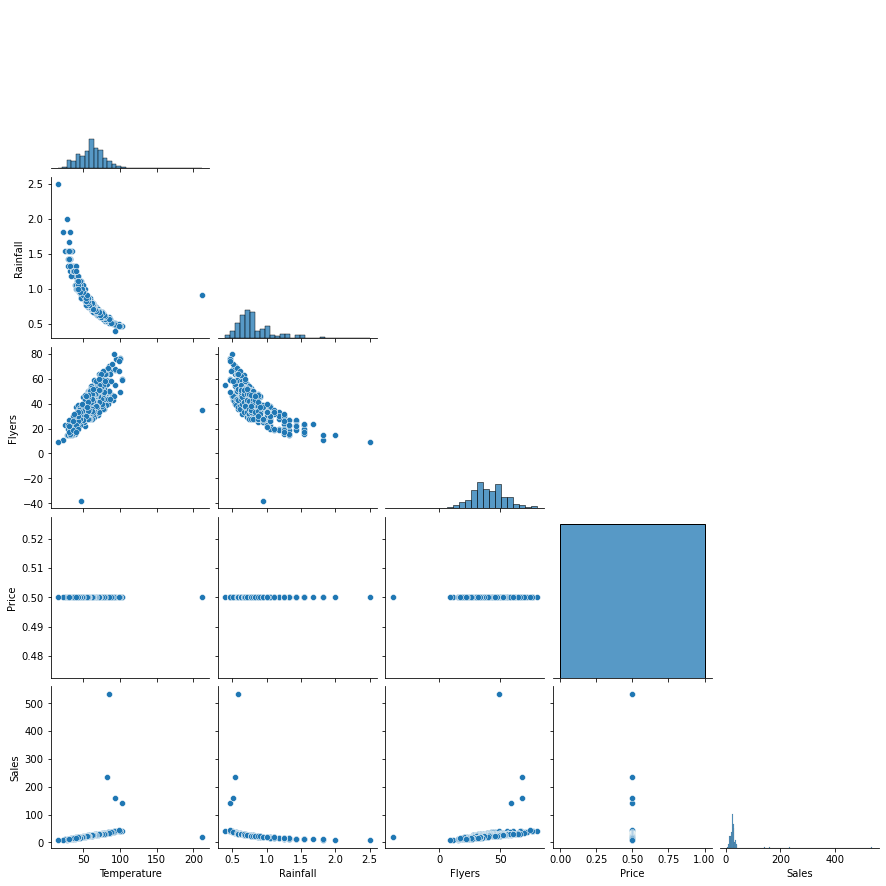

In [10]:
sns.pairplot(df, corner=True)

Day


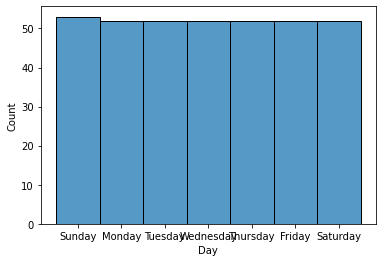

Temperature


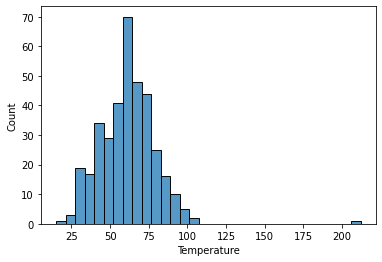

Rainfall


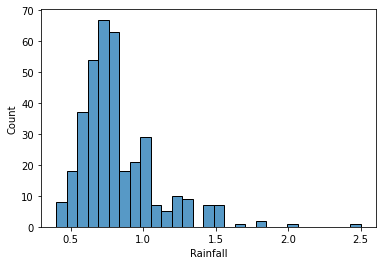

Flyers


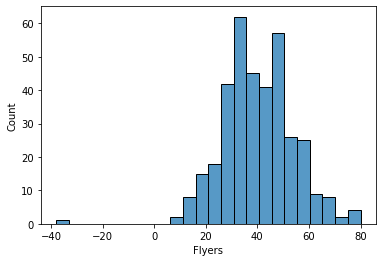

Price


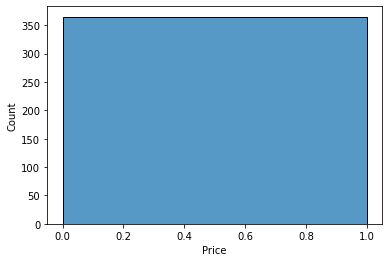

Sales


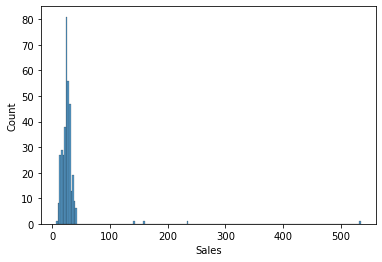

In [11]:
for col in df.columns:
    print(col)
    sns.histplot(df[col])
    plt.show()

### Multiplier = 1.5

**Lower Outliers:**

In [12]:
# Temp
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Temperature', 1.5)

df[df['Temperature'] < inner_lower_fence]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-05,Tuesday,22.0,1.82,11,0.5,10
2017-12-31,Sunday,15.1,2.50,9,0.5,7


In [13]:
# Rainfall
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Rainfall', 1.5)

df[df['Rainfall'] < inner_lower_fence]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-05,Wednesday,93.0,0.4,55,0.5,40


In [14]:
# Flyers
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Flyers', 1.5)

df[df['Flyers'] < inner_lower_fence]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


In [15]:
# Sales
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Price', 1.5)

df[df['Price'] < inner_lower_fence]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [16]:
# Sales
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Sales', 1.5)

df[df['Sales'] < inner_lower_fence]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7


Lower Takeaways:

- Temperature, rainfall, and Sales don't seem out of the ordinary
- Price has no outliers below the inner lower fence
- Flyers has a negative value which is likely an error.

---
**Upper Outliers:**

In [17]:
df.Temperature.describe()

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-27,Wednesday,42.7,1.00,33,0.5,19
2017-02-09,Thursday,42.7,1.00,39,0.5,19
2017-01-18,Wednesday,42.8,1.18,33,0.5,16
2017-01-19,Thursday,43.1,1.18,30,0.5,17
2017-01-10,Tuesday,43.4,1.05,33,0.5,18
...,...,...,...,...,...,...
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-07-22,Saturday,99.6,0.47,49,0.5,42
2017-06-26,Monday,102.6,0.47,60,0.5,42


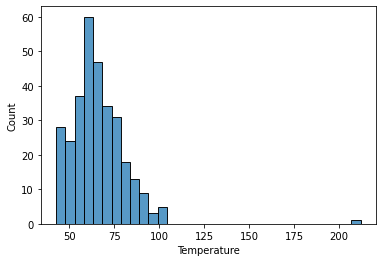

In [18]:
# Temp
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Temperature', 1.5)

sns.histplot(df[df['Temperature'] > inner_upper_fence].Temperature)

df[df['Temperature'] > inner_upper_fence].sort_values('Temperature')

In [19]:
df.Rainfall.describe()

count    365.000000
mean       0.825973
std        0.273890
min        0.400000
25%        0.650000
50%        0.740000
75%        0.910000
max        2.500000
Name: Rainfall, dtype: float64

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-05-22,Monday,71.0,0.67,34,0.5,30
2017-05-17,Wednesday,70.7,0.67,43,0.5,29
2017-05-26,Friday,72.0,0.67,63,0.5,30
2017-05-30,Tuesday,75.0,0.67,43,0.5,30
2017-05-16,Tuesday,65.7,0.67,55,0.5,29
...,...,...,...,...,...,...
2017-01-16,Monday,30.6,1.67,24,0.5,12
2017-12-10,Sunday,31.3,1.82,15,0.5,11
2017-12-05,Tuesday,22.0,1.82,11,0.5,10


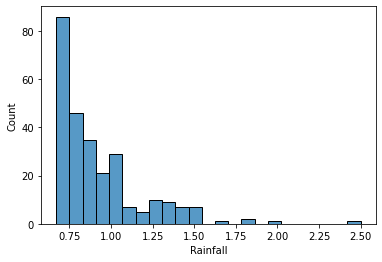

In [20]:
# Rainfall
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Rainfall', 1.5)

sns.histplot(df[df['Rainfall'] > inner_upper_fence].Rainfall)

df[df['Rainfall'] > inner_upper_fence].sort_values('Rainfall')

In [21]:
df.Flyers.describe()

count    365.000000
mean      40.104110
std       13.786445
min      -38.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: Flyers, dtype: float64

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-03-27,Monday,60.5,0.74,30,0.5,25
2017-12-16,Saturday,35.5,1.25,30,0.5,15
2017-12-15,Friday,42.1,1.05,30,0.5,17
2017-01-19,Thursday,43.1,1.18,30,0.5,17
2017-03-11,Saturday,58.2,0.83,30,0.5,24
...,...,...,...,...,...,...
2017-07-27,Thursday,97.9,0.47,74,0.5,43
2017-07-18,Tuesday,99.3,0.47,76,0.5,41
2017-06-21,Wednesday,94.3,0.47,76,0.5,41


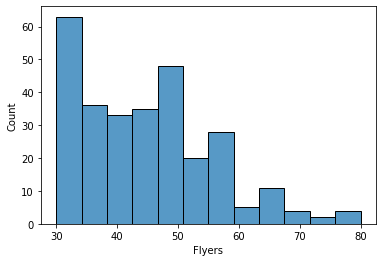

In [22]:
# Flyers
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Flyers', 1.5)

sns.histplot(df[df['Flyers'] > inner_upper_fence].Flyers)

df[df['Flyers'] > inner_upper_fence].sort_values('Flyers')

In [23]:
inner_upper_fence

29.25

In [24]:
df.Price.describe()

count    365.0
mean       0.5
std        0.0
min        0.5
25%        0.5
50%        0.5
75%        0.5
max        0.5
Name: Price, dtype: float64

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


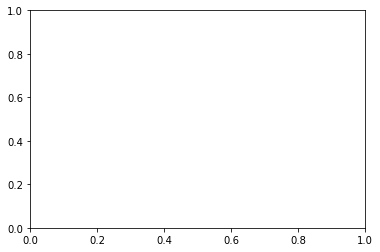

In [28]:
# Price
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Price', 1.5)

sns.histplot(df[df['Price'] > inner_upper_fence].Price)

df[df['Price'] < inner_upper_fence].sort_values('Price')

In [26]:
df.Sales.describe()

count    365.000000
mean      27.865753
std       30.948132
min        7.000000
25%       20.000000
50%       25.000000
75%       30.000000
max      534.000000
Name: Sales, dtype: float64

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-27,Wednesday,42.7,1.00,33,0.5,19
2017-11-04,Saturday,48.7,0.95,39,0.5,19
2017-02-22,Wednesday,47.7,0.95,36,0.5,19
2017-11-08,Wednesday,44.7,0.95,37,0.5,19
2017-11-12,Sunday,49.7,1.05,38,0.5,19
...,...,...,...,...,...,...
2017-07-27,Thursday,97.9,0.47,74,0.5,43
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-02,Sunday,93.4,0.51,68,0.5,158


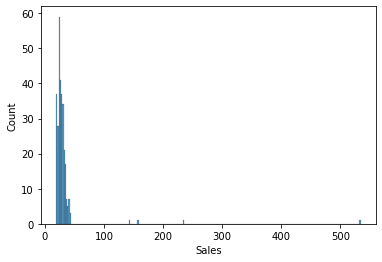

In [27]:
# Sales
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Sales', 1.5)

sns.histplot(df[df['Sales'] > inner_upper_fence].Sales)

df[df['Sales'] > inner_upper_fence].sort_values('Sales')

Upper Takeaways:
- Temperature has a day where the max temperature is a spicy 212
- Rainfall has several days that have more rain than normal
- Flyers has some days with more flyers
- Sales has a handful of days with more than 100
    - 1 day with over 500

---
### Multiplier = 3.0

**Lower Outliers:**

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7


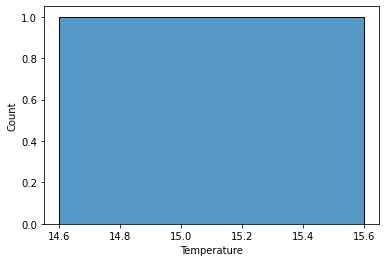

In [35]:
# Temp
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Temperature', 3)

sns.histplot(df[df['Temperature'] < inner_lower_fence].Temperature)

df[df['Temperature'] < inner_lower_fence].sort_values('Temperature')

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


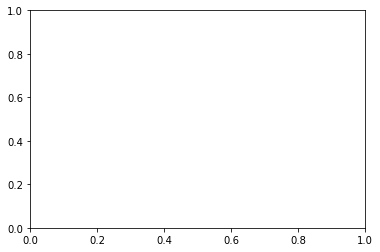

In [36]:
# Rainfall
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Rainfall', 3)

sns.histplot(df[df['Rainfall'] < inner_lower_fence].Rainfall)

df[df['Rainfall'] < inner_lower_fence].sort_values('Rainfall')

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


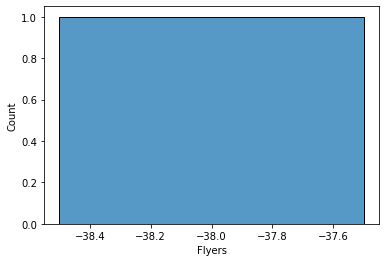

In [37]:
# Flyers
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Flyers', 3)

sns.histplot(df[df['Flyers'] < inner_lower_fence].Flyers)

df[df['Flyers'] < inner_lower_fence].sort_values('Flyers')

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


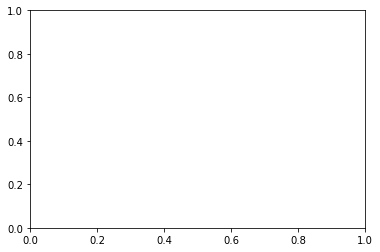

In [40]:
# Price
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Price', 3)

sns.histplot(df[df['Price'] < inner_lower_fence].Price)

df[df['Price'] < inner_lower_fence].sort_values('Price')

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


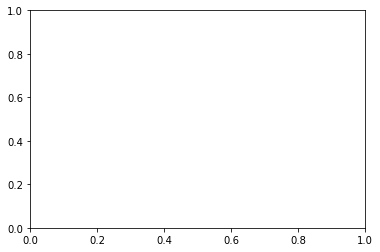

In [41]:
# Sales
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Sales', 3)

sns.histplot(df[df['Sales'] < inner_lower_fence].Sales)

df[df['Sales'] < inner_lower_fence].sort_values('Sales')

---
**Upper Outliers:**

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-28,Tuesday,49.6,0.91,45,0.5,22
2017-11-26,Sunday,49.7,1.05,30,0.5,19
2017-11-12,Sunday,49.7,1.05,38,0.5,19
2017-11-29,Wednesday,50.0,0.95,27,0.5,20
2017-02-10,Friday,50.0,0.91,40,0.5,20
...,...,...,...,...,...,...
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-07-22,Saturday,99.6,0.47,49,0.5,42
2017-06-26,Monday,102.6,0.47,60,0.5,42


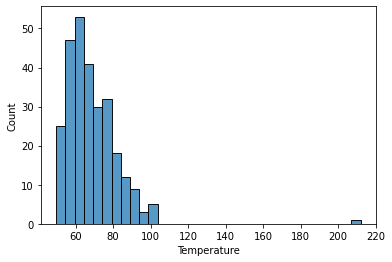

In [42]:
# Temp
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Temperature', 3)

sns.histplot(df[df['Temperature'] > inner_upper_fence].Temperature)

df[df['Temperature'] > inner_upper_fence].sort_values('Temperature')

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-04-19,Wednesday,59.8,0.77,53,0.5,26
2017-03-06,Monday,61.2,0.77,28,0.5,24
2017-03-07,Tuesday,60.2,0.77,32,0.5,24
2017-03-08,Wednesday,58.5,0.77,43,0.5,25
2017-03-17,Friday,56.5,0.77,50,0.5,25
...,...,...,...,...,...,...
2017-01-16,Monday,30.6,1.67,24,0.5,12
2017-12-10,Sunday,31.3,1.82,15,0.5,11
2017-12-05,Tuesday,22.0,1.82,11,0.5,10


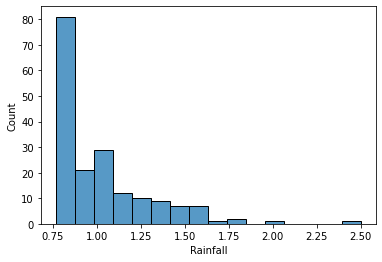

In [43]:
# Rainfall
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Rainfall', 3)

sns.histplot(df[df['Rainfall'] > inner_upper_fence].Rainfall)

df[df['Rainfall'] > inner_upper_fence].sort_values('Rainfall')

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-31,Monday,74.6,0.61,38,0.5,32
2017-09-11,Monday,68.4,0.69,38,0.5,28
2017-09-28,Thursday,67.4,0.69,38,0.5,28
2017-08-07,Monday,75.0,0.67,38,0.5,30
2017-10-31,Tuesday,54.2,0.77,38,0.5,24
...,...,...,...,...,...,...
2017-07-27,Thursday,97.9,0.47,74,0.5,43
2017-06-21,Wednesday,94.3,0.47,76,0.5,41
2017-07-18,Tuesday,99.3,0.47,76,0.5,41


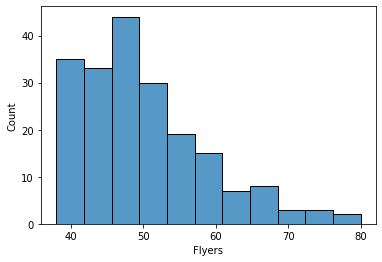

In [44]:
# Flyers
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Flyers', 3)

sns.histplot(df[df['Flyers'] > inner_upper_fence].Flyers)

df[df['Flyers'] > inner_upper_fence].sort_values('Flyers')

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


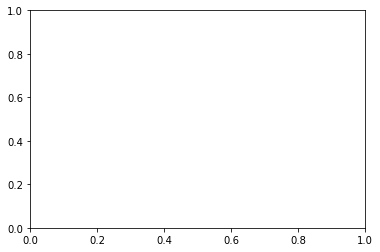

In [45]:
# Price
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Price', 3)

sns.histplot(df[df['Price'] > inner_upper_fence].Price)

df[df['Price'] > inner_upper_fence].sort_values('Price')

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-04,Saturday,56.6,0.83,46,0.5,22
2017-11-24,Friday,53.6,0.83,46,0.5,22
2017-11-20,Monday,55.6,0.87,41,0.5,22
2017-11-10,Friday,54.6,0.87,28,0.5,22
2017-11-06,Monday,51.6,0.91,28,0.5,22
...,...,...,...,...,...,...
2017-07-27,Thursday,97.9,0.47,74,0.5,43
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-02,Sunday,93.4,0.51,68,0.5,158


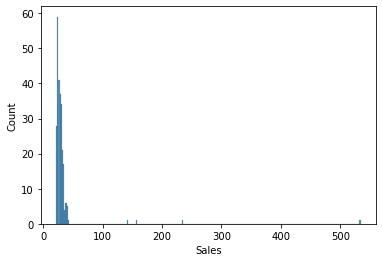

In [46]:
# Sales
inner_upper_fence, inner_lower_fence = inner_upper_and_lower_fence(df, 'Sales', 3)

sns.histplot(df[df['Sales'] > inner_upper_fence].Sales)

df[df['Sales'] > inner_upper_fence].sort_values('Sales')

Takeaways:
- Temperature, Flyers, and Sales are still heavily affected by their extreme values
    - Temp: 212
    - Flyers: -38
    - Sales: 534

#### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

#### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

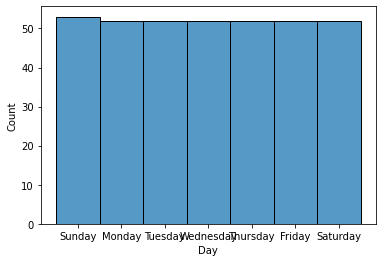

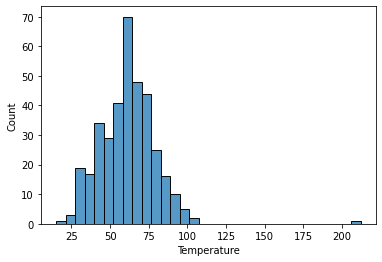

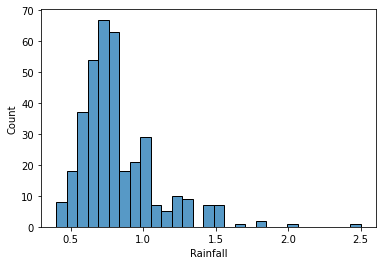

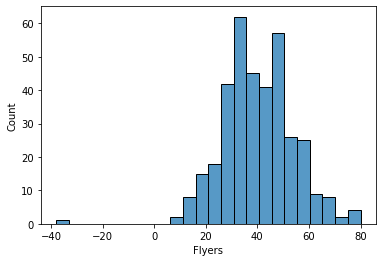

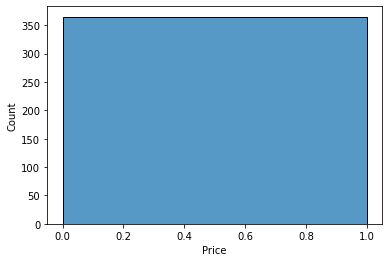

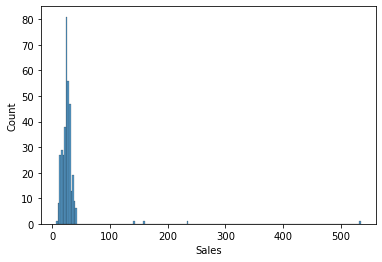

In [48]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

Temperature

In [56]:
zscores_rain = (df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std()

# Finds all of the observations two standard deviations or more.
df[zscores_rain.abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-01-07,Saturday,32.9,1.54,19,0.5,13
2017-01-11,Wednesday,32.6,1.54,23,0.5,12
2017-01-16,Monday,30.6,1.67,24,0.5,12
2017-01-17,Tuesday,32.2,1.43,26,0.5,14
2017-01-20,Friday,31.6,1.43,20,0.5,12
2017-01-24,Tuesday,28.6,1.54,20,0.5,12
2017-12-04,Monday,34.9,1.54,16,0.5,13


In [57]:
# Finds all of the observations three standard deviations or more
df[zscores_rain.abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-16,Monday,30.6,1.67,24,0.5,12
2017-12-05,Tuesday,22.0,1.82,11,0.5,10
2017-12-10,Sunday,31.3,1.82,15,0.5,11
2017-12-31,Sunday,15.1,2.50,9,0.5,7


Rainfall

In [54]:
zscores_temp = (df.Temperature - df.Temperature.mean()) / df.Temperature.std()

# Finds all of the observations two standard deviations or more.
df[zscores_temp.abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-06-26,Monday,102.6,0.47,60,0.5,42
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-10,Monday,98.0,0.49,66,0.5,40
2017-07-18,Tuesday,99.3,0.47,76,0.5,41
2017-07-22,Saturday,99.6,0.47,49,0.5,42
2017-07-27,Thursday,97.9,0.47,74,0.5,43
2017-12-05,Tuesday,22.0,1.82,11,0.5,10


In [55]:
# Finds all of the observations three standard deviations or more
df[zscores_temp.abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21


Flyers

In [62]:
zscores_flyers = (df.Flyers - df.Flyers.mean()) / df.Flyers.std()

# Finds all of the observations two standard deviations or more.
df[zscores_flyers.abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-06-20,Tuesday,85.1,0.54,70,0.5,37
2017-06-21,Wednesday,94.3,0.47,76,0.5,41
2017-07-02,Sunday,93.4,0.51,68,0.5,158
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-14,Friday,92.0,0.50,80,0.5,40
2017-07-18,Tuesday,99.3,0.47,76,0.5,41
2017-07-23,Sunday,89.1,0.51,72,0.5,37
2017-07-24,Monday,83.5,0.57,69,0.5,35


In [63]:
# Finds all of the observations three standard deviations or more.
df[zscores_flyers.abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


In [64]:
zscores_sales = (df.Sales - df.Sales.mean()) / df.Sales.std()

# Finds all of the observations two standard deviations or more.
df[zscores_sales.abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-02,Sunday,93.4,0.51,68,0.5,158
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534


In [65]:
# Finds all of the observations three standard deviations or more.
df[zscores_sales.abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-02,Sunday,93.4,0.51,68,0.5,158
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534
